# Prefect for data pipelines in Python
Workshop materials for [Prefect](http://prefect.io/) for data pipelines in Python for the Research Bazaar Tucson, AZ 2021

See the repository at: https://github.com/VenturaFranklin/resbazTucson2021-Prefect 

# Hello World


In [ ]:
# Install prefect
!pip3 install prefect

     |████████████████████████████████| 522kB 4.2MB/s 
     |████████████████████████████████| 962kB 19.5MB/s 
     |████████████████████████████████| 163kB 24.7MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 706kB 24.2MB/s 
     |████████████████████████████████| 153kB 30.4MB/s 
     |████████████████████████████████| 112kB 28.9MB/s 
     |████████████████████████████████| 491kB 30.9MB/s 
     |████████████████████████████████| 71kB 6.9MB/s 
ERROR: distributed 2021.5.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
  Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3


In [ ]:
# Import the main code classes/functions
from time import sleep
import prefect
from prefect import Flow, Parameter, task, Client
# set logging so we can see everything that is happening
main_logger = prefect.utilities.logging.get_logger()
main_logger.setLevel("DEBUG")

In [ ]:
@task
def test_logger(file_path, config):
    """
    Task used for testing and learning about prefect
    """
    logger = prefect.context.get("logger")
    logger.debug(f"Received {file_path}, {config}")
    if file_path == "ERROR":
        1/0
    return "Hello"

In [ ]:
# We make a function that is the task in the flow
@task(log_stdout=True)
def say_hello(word):
    """
    An example function with some longer time to process
    """
    for x in range(10):
        print(f"Say, {word}. Don't tell me what to do. {x}")
        sleep(3)

In [ ]:
def define_test_flow():  # pragma: no cover
    """
    Flow used for testing and learning about prefect
    Do not really need parameters if you don't want them
    """
    with Flow(name="Test Flow") as flow:
        file_path = Parameter("file_path")
        config = Parameter("config")
        word = test_logger(file_path, config)
        say_hello(word, upstream_tasks=[word])
    return flow

In [ ]:
flow = define_test_flow()

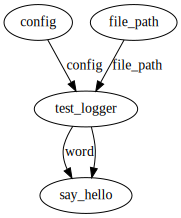

In [ ]:
# We can visualize the flow and it shows the incoming parameters
# and it would show other tasks
flow.visualize(filename="flow_visualization")

In [ ]:
# We can run the flow right now, right here
flow.run(file_path="TEST_PATH", config={1: "Test"})
# flow.run(file_path="ERROR", config={1: "Test"}) # If you want to see error

[2021-05-20 16:56:04+0000] INFO - prefect.FlowRunner | Beginning Flow run for 'Test Flow'
[2021-05-20 16:56:04+0000] DEBUG - prefect.FlowRunner | Using executor type LocalExecutor
[2021-05-20 16:56:04+0000] DEBUG - prefect.FlowRunner | Flow 'Test Flow': Handling state change from Scheduled to Running
[2021-05-20 16:56:04+0000] INFO - prefect.TaskRunner | Task 'config': Starting task run...
[2021-05-20 16:56:04+0000] DEBUG - prefect.TaskRunner | Task 'config': Handling state change from Pending to Running
[2021-05-20 16:56:04+0000] DEBUG - prefect.TaskRunner | Task 'config': Calling task.run() method...
[2021-05-20 16:56:04+0000] DEBUG - prefect.TaskRunner | Task 'config': Handling state change from Running to Success
[2021-05-20 16:56:04+0000] INFO - prefect.TaskRunner | Task 'config': Finished task run for task with final state: 'Success'
[2021-05-20 16:56:04+0000] INFO - prefect.TaskRunner | Task 'file_path': Starting task run...
[2021-05-20 16:56:04+0000] DEBUG - prefect.TaskRunner 

<Success: "All reference tasks succeeded.">

In [ ]:
# Let's send to the cloud to see it
!prefect backend cloud

Backend switched to cloud


In [ ]:
# You need to get a key from: https://cloud.prefect.io/user/keys
!prefect auth login -t {GET_YOUR_KEY}

In [ ]:
# Create a project for organization
!prefect create project 'Hello, World!'

Hello, World! created


In [ ]:
# Send your flow STRUCTURE to the cloud
flow_id = flow.register(project_name="Hello, World!")

Flow URL: https://cloud.prefect.io/venturafranklin/flow/7abcd8a1-3dd4-451b-9522-6292e6631330
 └── ID: 6903a935-b121-4fdc-888a-e7a944bdb854
 └── Project: Hello, World!
 └── Labels: ['b6ed7a34e453']


In [ ]:
# We need this id later for triggering the flow
print(flow_id)

6903a935-b121-4fdc-888a-e7a944bdb854


In [ ]:
from prefect import Client

In [ ]:
# Register the start of a flow run with the cloud
#      so the system knows it is coming
c = Client()
c.create_flow_run(flow_id=flow_id, parameters={"file_path": "TEST_PATH", "config": {1: "Test"}})
# c.create_flow_run(flow_id=flow_id, parameters={"file_path": "ERROR", "config": {1: "Test"}})  # If you want to see error

'18eab1fb-3eec-46f3-a988-17dbf1ca517b'

In [ ]:
# You will need to make a token: https://cloud.prefect.io/team/service-accounts
flow.run_agent(token="{PUT_TOKEN_HERE}")
# This would normally be done in another terminal, 
#     you will need to kill it after it runs
#     This is what actually runs the flow!